<a href="https://colab.research.google.com/github/GreatLearningAIML1/bangalore-aug19-batch-vybhavsv/blob/master/NLP_R10_Project2_Sarcasm_Detection_Vybhav_SV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sarcasm Detection
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

## Install `Tensorflow2.0` 

In [1]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

     |████████████████████████████████| 86.3MB 50kB/s 
     |████████████████████████████████| 3.8MB 40.3MB/s 
     |████████████████████████████████| 450kB 38.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=0638fb7627f933971df2efa110ed8254fd1ab3c0fb7e9e0b9bbec61ef49dd3cf
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: t

## Get Required Files from Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [4]:
import os
import pandas as pd

ls
#print(os.listdir('drive'),'\n')
#print(os.listdir("drive/My Drive"),'\n')
#print(os.listdir("drive/My Drive/Colab_Notebooks/"),'\n')
#print(os.listdir("drive/My Drive/Colab_Notebooks/Statistical_NLP"),'\n')

drive/  sample_data/


In [5]:
#Set your project path 
project_path = "drive/My Drive/Colab_Notebooks/Statistical_NLP"

print(os.listdir(project_path))

['NLP_R10_Project2_Sarcasm Detection_Vybhav_SV.ipynb', '2. Stemming _ Lemmatization using NLTK.ipynb', '4. Test Processing _ Web Data Retrieval.ipynb', '3. Word2vec_gensim_movie_data.ipynb', '5. Understanding Syntax _ Structure using spaCy.ipynb', '1. Working with Textual Data.pptx', '2. Word Vectors.pptx', '1. Text Classification - SMS.ipynb', '1b. Text Classification Exercise - Movie Reviews.ipynb', 'Sarcasm-Detection-NLP-master', 'Sarcasm_Headlines_Dataset.json', 'glove.6B.300d.txt', 'glove.6B.zip', 'glove.6B.200d.txt', 'glove.6B.50d.txt', 'glove.6B.100d.txt']


#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [6]:
sh_data = pd.read_json(os.path.join(project_path,'Sarcasm_Headlines_Dataset.json'),lines=True)

In [7]:
sh_data

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0
...,...,...,...
26704,https://www.huffingtonpost.com/entry/american-...,american politics in moral free-fall,0
26705,https://www.huffingtonpost.com/entry/americas-...,america's best 20 hikes,0
26706,https://www.huffingtonpost.com/entry/reparatio...,reparations and obama,0
26707,https://www.huffingtonpost.com/entry/israeli-b...,israeli ban targeting boycott supporters raise...,0


In [8]:
print (sh_data.shape,'\n')
sh_data.describe()

(26709, 3) 



,is_sarcastic
count,26709.000000
mean,0.438953
std,0.496269
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [9]:
sh_data['headline'][1]

"the 'roseanne' revival catches up to our thorny political mood, for better and worse"

In [10]:
sh_data.isnull().count()

article_link    26709
headline        26709
is_sarcastic    26709
dtype: int64

In [11]:
##The column headline needs to be cleaned up as we have special characters and numbers in the column

import re
from nltk.corpus import stopwords
import nltk
import string
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
def cleanData(text):
  text = re.sub(r'\d+', '', text)
  text = "".join([char for char in text if char not in string.punctuation])
  return text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
sh_data['headline']=sh_data['headline'].apply(cleanData)
sh_data['headline'][1]

'the roseanne revival catches up to our thorny political mood for better and worse'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc11b4a4320>]],
      dtype=object)

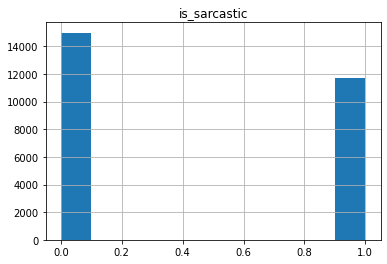

In [13]:
sh_data.hist()

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [14]:
data = sh_data.drop('article_link',axis=1)
data

,headline,is_sarcastic
0,former versace store clerk sues over secret bl...,0
1,the roseanne revival catches up to our thorny ...,0
2,mom starting to fear sons web series closest t...,1
3,boehner just wants wife to listen not come up ...,1
4,jk rowling wishes snape happy birthday in the ...,0
...,...,...
26704,american politics in moral freefall,0
26705,americas best hikes,0
26706,reparations and obama,0
26707,israeli ban targeting boycott supporters raise...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [15]:
maxlen = max([len(text) for text in data['headline']])
print(maxlen)

240


#**## Modelling**

## Import required modules required for modelling.

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [17]:
max_features = 10000
maxlen = max([len(text) for text in data['headline']])
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [18]:
tokenizer = Tokenizer(num_words=max_features,filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False)
tokenizer.fit_on_texts(data['headline'])

# Define X and y for your model.

In [19]:
X = tokenizer.texts_to_sequences(data['headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0],'\n')
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0  

## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [ ]:
tokenizer.word_index

In [20]:
vocab_size=len(tokenizer.word_index)
print (vocab_size)

27667


#**## Word Embedding**

## Get Glove Word Embeddings

In [21]:
glove_file = project_path + '/' +"glove.6B.zip"
print(glove_file)

drive/My Drive/Colab_Notebooks/Statistical_NLP/glove.6B.zip


In [22]:
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
  z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [23]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd


#embeddings
#len(embeddings)
#print(embeddings.get(word))
#len(embeddings.get(word))

# Create a weight matrix for words in training docs

In [24]:
embedding_matrix = np.zeros((vocab_size + 1, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    #print(word,'\n', i , '\n')
    #print(embedding_vector , '\n')
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())


400000

In [ ]:
#print(len(tokenizer.word_index.items()),'\n')
#print(embedding_matrix.shape,'\n') 
#print(embedding_matrix.shape[0],'\n')
#print(embedding_vector.shape,'\n')

27667 

(27668, 200) 

27668 

(200,) 



## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [25]:
### Embedding layer for hint 
## model.add(Embedding(num_words, embedding_size, weights = [embedding_matrix]))
### Bidirectional LSTM layer for hint 
## model.add(Bidirectional(LSTM(128, return_sequences = True)))

import tensorflow as tf

input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(embedding_matrix.shape[0],output_dim=200,weights=[embedding_matrix],input_length=maxlen, trainable=True)(input_layer)
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense=Dense(100,activation='relu')(drop)
out=Dense(2,activation='sigmoid')(dense)
out1=Dense(2,activation='softmax')(dense)

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [28]:
batch_size = 100
epochs = 5

model = Model(input_layer,out)    # ------------ model with activation='sigmoid'
model.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 240, 200)          5533600   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 5,896,398
Trainable params: 5,896,398
Non-trainable params: 0
_________________________________________________

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)        # ----------- for validation_split = 0.2 , splitting X and y 

model.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Train on 21367 samples
Epoch 1/5
21367/21367 [==============================] - 480s 22ms/sample - loss: 0.4465 - accuracy: 0.7833
Epoch 2/5
21367/21367 [==============================] - 473s 22ms/sample - loss: 0.2672 - accuracy: 0.8918
Epoch 3/5
21367/21367 [==============================] - 472s 22ms/sample - loss: 0.1742 - accuracy: 0.9340
Epoch 4/5
21367/21367 [==============================] - 455s 21ms/sample - loss: 0.1162 - accuracy: 0.9571
Epoch 5/5
21367/21367 [==============================] - 462s 22ms/sample - loss: 0.0739 - accuracy: 0.9747


In [30]:
model1 = Model(input_layer,out1)  # ------------ model with activation='softmax'
model1.compile(loss='sparse_categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 240)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 240, 200)          5533600   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               336896    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               25700     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 202       
Total params: 5,896,398
Trainable params: 5,896,398
Non-trainable params: 0
_________________________________________________

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)      # ----------- for validation_split = 0.2 , splitting X and y 

model1.fit(X_train,y_train,batch_size=batch_size, epochs=epochs, verbose=1)

Train on 21367 samples
Epoch 1/5
21367/21367 [==============================] - 463s 22ms/sample - loss: 0.0929 - accuracy: 0.9625
Epoch 2/5
21367/21367 [==============================] - 457s 21ms/sample - loss: 0.0340 - accuracy: 0.9899
Epoch 3/5
21367/21367 [==============================] - 458s 21ms/sample - loss: 0.0233 - accuracy: 0.9925
Epoch 4/5
21367/21367 [==============================] - 460s 22ms/sample - loss: 0.0184 - accuracy: 0.9940
Epoch 5/5
21367/21367 [==============================] - 457s 21ms/sample - loss: 0.0152 - accuracy: 0.9955


In [32]:
test_pred = model.predict(np.array(X_test), verbose=1)

5342/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [33]:
test_pred = [1 if j>i else 0 for i,j in test_pred]

In [34]:
test_pred1 = model1.predict(np.array(X_test), verbose=1)

5342/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [35]:
test_pred1 = [1 if j>i else 0 for i,j in test_pred1]

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, test_pred)

array([[2582,  449],
       [ 350, 1961]])

In [37]:
confusion_matrix(y_test, test_pred1)

array([[2673,  358],
       [ 399, 1912]])

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      3031
           1       0.81      0.85      0.83      2311

    accuracy                           0.85      5342
   macro avg       0.85      0.85      0.85      5342
weighted avg       0.85      0.85      0.85      5342



In [39]:
print(classification_report(y_test, test_pred1))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      3031
           1       0.84      0.83      0.83      2311

    accuracy                           0.86      5342
   macro avg       0.86      0.85      0.86      5342
weighted avg       0.86      0.86      0.86      5342



I tried two different models varying in the activation function. One was using sigmoid and other softmax and though the accuracy values were almost similar around 97.5 % and 99.6 % in the last epoch run, the confusion matrix gives a different picture.

Using softmax function definitely trained better having lower False Positives (FP) when you take FP into consideration. Given the testing done so far, these models are pretty close enough to finding out the sarcastic tweets.

In [40]:
# Another model try by slightly changing the parameters

model3 = Sequential()
model3.add(Embedding(vocab_size + 1, embedding_size, weights = [embedding_matrix]))
model3.add(Bidirectional(LSTM(128, return_sequences = True)))
model3.add(Dropout(0.2))
model3.add(Dense(64))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 200)         5533600   
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 256)         336896    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 256)         0         
_________________________________________________________________
dense_3 (Dense)              (None, None, 64)          16448     
_________________________________________________________________
dense_4 (Dense)              (None, None, 1)           65        
Total params: 5,887,009
Trainable params: 5,887,009
Non-trainable params: 0
_________________________________________________________________


In [41]:
model3.fit(X,y,
          epochs=epochs,
          batch_size=batch_size,
          verbose = 1,
          validation_split=0.2)

Train on 21367 samples, validate on 5342 samples
Epoch 1/5
21367/21367 [==============================] - 530s 25ms/sample - loss: 0.6211 - accuracy: 0.6725 - val_loss: 0.5492 - val_accuracy: 0.7449
Epoch 2/5
21367/21367 [==============================] - 535s 25ms/sample - loss: 0.5850 - accuracy: 0.6975 - val_loss: 0.5204 - val_accuracy: 0.7562
Epoch 3/5
21367/21367 [==============================] - 538s 25ms/sample - loss: 0.6127 - accuracy: 0.6551 - val_loss: 0.6709 - val_accuracy: 0.5761
Epoch 4/5
21367/21367 [==============================] - 536s 25ms/sample - loss: 0.6688 - accuracy: 0.5665 - val_loss: 0.6728 - val_accuracy: 0.5751
Epoch 5/5
21367/21367 [==============================] - 537s 25ms/sample - loss: 0.6371 - accuracy: 0.6124 - val_loss: 0.5421 - val_accuracy: 0.7605


In [42]:
y_pred = model3.predict(X)
y_pred.shape

(26709, 240, 1)

In [43]:
y

array([0, 0, 1, ..., 0, 0, 0])

The accuracy with 76 % is not that great compared to what we achieved above. This model will further need to be fine-tuned, but for now , i settle with above two models behavior and prediction outcomes.